In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

data = pd.read_csv('Trump_comments_2020_clean.csv')
data.head()

Unnamed: 0                author  \
0           0           khalabrakis   
1           1            Whopper_Jr   
2           2  Sustainable_Saltmine   
3           3              TheC0zmo   
4           4    brotherjustincrowe   

                                                body  created_utc    link_id  \
0  Fighters... That means warrior, like people wh...   1577836803  t3_ei6h2x   
1  it is plausible that Republicans will never wi...   1577836806  t3_ei4ag7   
2  we must send bartenders back to bartending and...   1577836807  t3_eiay7b   
3  Bullshit. you are blaming a fiscally conservat...   1577836814  t3_ei40gl   
4  Military R&amp;D and intel is not "no reason."...   1577836818  t3_ei51lq   

    parent_id  score  
0   t3_ei6h2x      1  
1   t3_ei4ag7      1  
2   t3_eiay7b      1  
3  t1_fco5fri      1  
4  t1_fcodqek      1

In [3]:
data.shape

(618858, 7)

In [4]:
data_score = data[data['score'] > 1] 
data_score.shape

(176987, 7)

Сразу видим, что в сообществе Трампа гораздо большей лакайют.

In [5]:
data_score = data[data['score'] > 0] 
data_score.shape

(560072, 7)

При этом комментариев, которые минусуют не очень много

In [6]:
data_author = data['author'].value_counts().rename_axis('nickname').to_frame('posts_count')
data_author.reset_index(inplace = True)
data_author.head()

nickname  posts_count
0        soldio101         3777
1  ifuc---pipeline         2131
2       Joey_Lopez         1826
3        Sir_Girth         1703
4         TFU_Merk         1500

Посмотрим, кто вообще сколько постов оставил. 

In [7]:
data_author['posts_count'].mean()

8.351998056601483

In [8]:
data_author['posts_count'].median()

2.0

Среднее число постов еще меньше чем у Байдена.

In [9]:
data_author.shape

(74097, 2)

In [10]:
data_author[data_author['posts_count'] > 10].shape

(9206, 2)

In [11]:
data_author[data_author['posts_count'] > 1000].shape

(21, 2)

Любопытное совпадение, реально часто пишущих авторов ровно столько же, сколько и среди сторонников Байдена. Но это разные люди, так что просто совпадение. 

In [12]:
data_author[data_author['posts_count'] > 500].shape

(82, 2)

In [13]:
over_thousand_posts = data_author[data_author['posts_count'] > 1000]


И снова есть один человек, пишущий в разы больше всего сабреддита, здесь он даже сильнее выделяется. 

<AxesSubplot:xlabel='nickname'>

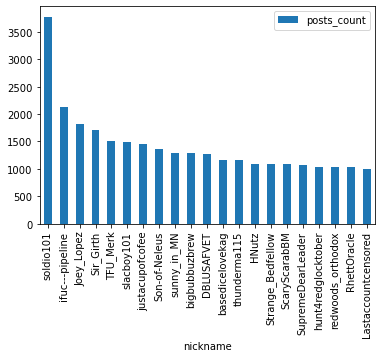

In [14]:
over_thousand_posts.plot(kind = 'bar', x = 'nickname', y = 'posts_count')

In [15]:
data['time'] = pd.to_datetime(data['created_utc'], unit = 's')

In [16]:
data.head()

Unnamed: 0                author  \
0           0           khalabrakis   
1           1            Whopper_Jr   
2           2  Sustainable_Saltmine   
3           3              TheC0zmo   
4           4    brotherjustincrowe   

                                                body  created_utc    link_id  \
0  Fighters... That means warrior, like people wh...   1577836803  t3_ei6h2x   
1  it is plausible that Republicans will never wi...   1577836806  t3_ei4ag7   
2  we must send bartenders back to bartending and...   1577836807  t3_eiay7b   
3  Bullshit. you are blaming a fiscally conservat...   1577836814  t3_ei40gl   
4  Military R&amp;D and intel is not "no reason."...   1577836818  t3_ei51lq   

    parent_id  score                time  
0   t3_ei6h2x      1 2020-01-01 00:00:03  
1   t3_ei4ag7      1 2020-01-01 00:00:06  
2   t3_eiay7b      1 2020-01-01 00:00:07  
3  t1_fco5fri      1 2020-01-01 00:00:14  
4  t1_fcodqek      1 2020-01-01 00:00:18

Посмотрим распределение количества постов по времени.

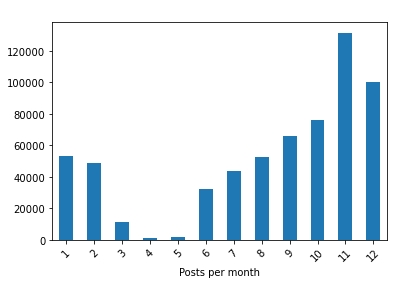

In [17]:
plt.title('Posts Distribution', color = 'white', size = 12)
month_data = data.groupby(data["time"].dt.month).time.count()
month_data.plot(kind = "bar")
plt.xlabel('Posts per month')
plt.xticks(rotation = 45)
plt.show()

Очень резкий спад активности весной. Интересно посмотреть, что обсуждали в эти месяцы. Куда меньший спад в декабре, понятен в силу недовольства результатами. 

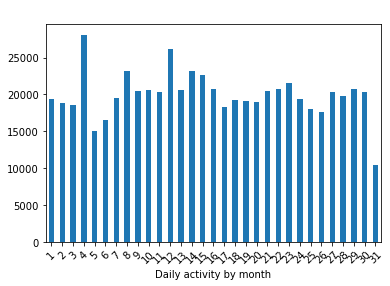

In [18]:
plt.title('Posts Distribution', color = 'white', size = 15)
month_data = data.groupby(data["time"].dt.day).time.count()
month_data.plot(kind = "bar")
plt.xlabel('Daily activity by month')
plt.xticks(rotation = 45)
plt.show()

Ого, сторонники Трампа куда более активны в течение месяца. Пик все еще в день выборов. 

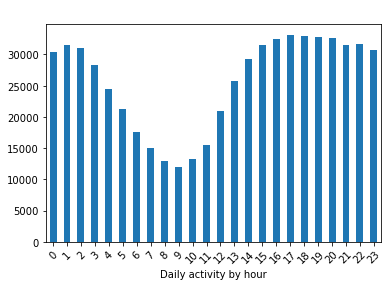

In [19]:
plt.title('Posts Distribution', color = 'white', size = 15)
month_data = data.groupby(data["time"].dt.hour).time.count()
month_data.plot(kind = "bar")
plt.xlabel('Daily activity by hour')
plt.xticks(rotation = 45)
plt.show()

Тут ничего особенного на фоне Байдена 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


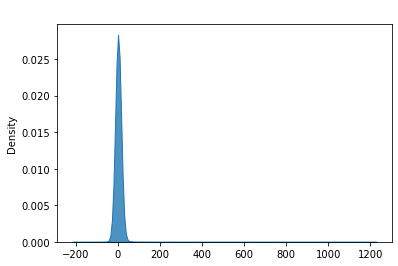

In [20]:
plt.title('Posts score', color = 'white', size = 15)
sns.kdeplot(data['score'], shade = True, 
            alpha = .8, legend = None, bw = 2)
plt.xlabel('')
plt.show()

Глянем суммарное число лайков по авторам и как оно соотносится с количеством постов. 

In [21]:
data_sc= pd.DataFrame(data.groupby('author').agg({'score':['sum']}))
data_sc.columns = ['sum']

data_sc = data_sc.reset_index()

In [22]:
data_sc['sum'].median()

2.0

In [23]:
data_sc['sum'].mean()

16.45792677166417

Среднее в 2 раза больше среднего числа постов. Еще раз убеждаемся, что лайкают тут активнее. 

In [24]:
data_sc[data_sc['sum'] > 10].shape

(12848, 2)

In [25]:
data_sc[data_sc['sum'] > 1000].shape

(130, 2)

In [26]:
data_sc.head()


author  sum
0    ------_________    1
1        -----0-----  103
2      ----0___0----   -8
3  ---AbrahamLincoln   17
4      --0IIIIIII0--    2

In [27]:
data_score.head()

Unnamed: 0                author  \
0           0           khalabrakis   
1           1            Whopper_Jr   
2           2  Sustainable_Saltmine   
3           3              TheC0zmo   
4           4    brotherjustincrowe   

                                                body  created_utc    link_id  \
0  Fighters... That means warrior, like people wh...   1577836803  t3_ei6h2x   
1  it is plausible that Republicans will never wi...   1577836806  t3_ei4ag7   
2  we must send bartenders back to bartending and...   1577836807  t3_eiay7b   
3  Bullshit. you are blaming a fiscally conservat...   1577836814  t3_ei40gl   
4  Military R&amp;D and intel is not "no reason."...   1577836818  t3_ei51lq   

    parent_id  score  
0   t3_ei6h2x      1  
1   t3_ei4ag7      1  
2   t3_eiay7b      1  
3  t1_fco5fri      1  
4  t1_fcodqek      1

In [28]:
over_thousand_sumscore = data_sc[data_sc['sum'] > 1000]

In [29]:
over_thousand_posts.head()

nickname  posts_count
0        soldio101         3777
1  ifuc---pipeline         2131
2       Joey_Lopez         1826
3        Sir_Girth         1703
4         TFU_Merk         1500

In [30]:
over_thousand_posts = over_thousand_posts.rename(columns={"nickname": "author"})

In [31]:
over_thousand_intersection = pd.merge(over_thousand_posts, over_thousand_sumscore, how ='inner', on = ['author'])

In [32]:
over_thousand_intersection.head()

author  posts_count    sum
0        soldio101         3777  13511
1  ifuc---pipeline         2131   3406
2       Joey_Lopez         1826   7401
3        Sir_Girth         1703   4610
4         TFU_Merk         1500   3287

In [33]:
over_thousand_intersection.shape 

(20, 3)

Больше тысячи постов и суммарное число лайков больше тысячи пересекаются ровно по тем у кого больше тысячи постов. 

In [34]:
over_thousand = pd.merge(over_thousand_posts, over_thousand_sumscore, how ='outer', on = ['author'])

In [35]:
over_thousand.shape

(131, 3)

In [36]:
over_thousand


author  posts_count      sum
0             soldio101       3777.0  13511.0
1       ifuc---pipeline       2131.0   3406.0
2            Joey_Lopez       1826.0   7401.0
3             Sir_Girth       1703.0   4610.0
4              TFU_Merk       1500.0   3287.0
..                  ...          ...      ...
126           viverator          NaN   1204.0
127  weneedsporecowbell          NaN   1184.0
128        wingman43487          NaN   1596.0
129            zacaloni          NaN   1489.0
130        zeporscheguy          NaN   1426.0

[131 rows x 3 columns]

In [37]:
data_score = data.sort_values('score', ascending=False)

In [38]:
data_score['author'].iloc[0:30]

4548                 AnistarYT
56509                   MXPPMA
3082              BabyDubs6969
4341                    Gene04
7175              energysohigh
471798             bigtime1123
109681          sleeplessorion
44308        Das_Fuhrungsmacht
4439             Telcontar2012
4507       PropellerPowerCurve
283754               IronWolve
9487                 Top_Brush
4392          PresidentPreston
12801          KickingPugilist
3203               thelastlast
12780      Starfleet_Auxiliary
5012                coachbradb
465690            WarGreymon77
4886            MAGA___bitches
284135               Dan-In-SC
109745                  M31550
10401        LeftistsAreBigots
462507    alternatehistoryin3d
3827               armorkingII
7733                quebert123
4705         rebelde_sin_causa
8774                 KaktusDan
11572              NoPantsBaby
115412      BackwardPalindrome
470663               echopulse
Name: author, dtype: object

"Голосов народа" аж больше сотни... 

In [39]:
import tqdm
from tqdm.auto import tqdm
tqdm.pandas()


C:\Users\Admin\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [40]:
import datetime
def get_month_and_date(data):
    data['year'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).year)
    data['month'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).month)
    data['day'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).day)    

In [41]:
get_month_and_date(data)

In [42]:
data

Unnamed: 0                author  \
0                0           khalabrakis   
1                1            Whopper_Jr   
2                2  Sustainable_Saltmine   
3                3              TheC0zmo   
4                4    brotherjustincrowe   
...            ...                   ...   
618853      618856    Hillarys_Brown_Eye   
618854      618857            moshdagoat   
618855      618858     GuardYourPrivates   
618856      618859            dumbdotpng   
618857      618860             dsammmast   

                                                     body  created_utc  \
0       Fighters... That means warrior, like people wh...   1577836803   
1       it is plausible that Republicans will never wi...   1577836806   
2       we must send bartenders back to bartending and...   1577836807   
3       Bullshit. you are blaming a fiscally conservat...   1577836814   
4       Military R&amp;D and intel is not "no reason."...   1577836818   
...                                                   ...          ...   
618853  What a feckless piece of shit. His wife is a C...   1609459671   
618854  It needs to be all of them because you can be ...   1609459690   
618855  I too have been stopped by cops for no good re...   1609459705   
618856  So you mean you will not prove me wrong becaus...   1609459733   
618857  No, that is a libertarian extreme. Fascism is ...   1609459753   

          link_id   parent_id  score                time  year  month  day  
0       t3_ei6h2x   t3_ei6h2x      1 2020-01-01 00:00:03  2020      1    1  
1       t3_ei4ag7   t3_ei4ag7      1 2020-01-01 00:00:06  2020      1    1  
2       t3_eiay7b   t3_eiay7b      1 2020-01-01 00:00:07  2020      1    1  
3       t3_ei40gl  t1_fco5fri      1 2020-01-01 00:00:14  2020      1    1  
4       t3_ei51lq  t1_fcodqek      1 2020-01-01 00:00:18  2020      1    1  
...           ...         ...    ...                 ...   ...    ...  ...  
618853  t3_knxsoa   t3_knxsoa      1 2021-01-01 00:07:51  2021      1    1  
618854  t3_knx581   t3_knx581      1 2021-01-01 00:08:10  2021      1    1  
618855  t3_knt8ys  t1_ghn5gfa      1 2021-01-01 00:08:25  2021      1    1  
618856  t3_knsp5z  t1_ghnh1oj      1 2021-01-01 00:08:53  2021      1    1  
618857  t3_ko0lv0  t1_ghnmlat      1 2021-01-01 00:09:13  2021      1    1  

[618858 rows x 11 columns]

In [43]:

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
stop = stopwords.words("english")
def remove_stopwords(text):
    tokenized_text = tokenizer.tokenize(text)
    remove_stopwords = [w for w in tokenized_text if w not in stop]
    combined_text = ' '.join(remove_stopwords)
    return combined_text
data['tokenized'] = data['body'].apply(str).progress_apply(lambda x: remove_stopwords(x))

In [44]:
data['tokenized'] = data['tokenized'].progress_apply(lambda x: x.split())

In [45]:
data.head()

Unnamed: 0                author  \
0           0           khalabrakis   
1           1            Whopper_Jr   
2           2  Sustainable_Saltmine   
3           3              TheC0zmo   
4           4    brotherjustincrowe   

                                                body  created_utc    link_id  \
0  Fighters... That means warrior, like people wh...   1577836803  t3_ei6h2x   
1  it is plausible that Republicans will never wi...   1577836806  t3_ei4ag7   
2  we must send bartenders back to bartending and...   1577836807  t3_eiay7b   
3  Bullshit. you are blaming a fiscally conservat...   1577836814  t3_ei40gl   
4  Military R&amp;D and intel is not "no reason."...   1577836818  t3_ei51lq   

    parent_id  score                time  year  month  day  \
0   t3_ei6h2x      1 2020-01-01 00:00:03  2020      1    1   
1   t3_ei4ag7      1 2020-01-01 00:00:06  2020      1    1   
2   t3_eiay7b      1 2020-01-01 00:00:07  2020      1    1   
3  t1_fco5fri      1 2020-01-01 00:00:14  2020      1    1   
4  t1_fcodqek      1 2020-01-01 00:00:18  2020      1    1   

                                           tokenized  
0  [Fighters, That, means, warrior, like, people,...  
1  [plausible, Republicans, never, win, House, De...  
2  [must, send, bartenders, back, bartending, kee...  
3  [Bullshit, blaming, fiscally, conservative, so...  
4  [Military, R, amp, D, intel, reason, Maybe, go...

In [46]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(tokenized_text):
    return [lemmatizer.lemmatize(w) for w in tokenized_text]
data['lemmatized'] = data['tokenized'].progress_apply(lemmatize_text)

In [47]:
def detokenize(list_of_lemmas):
    detokenized_text = " ".join(list_of_lemmas) 
    return detokenized_text
data['detokenized'] = data['lemmatized'].progress_apply(detokenize)
    

In [48]:
data.head()

Unnamed: 0                author  \
0           0           khalabrakis   
1           1            Whopper_Jr   
2           2  Sustainable_Saltmine   
3           3              TheC0zmo   
4           4    brotherjustincrowe   

                                                body  created_utc    link_id  \
0  Fighters... That means warrior, like people wh...   1577836803  t3_ei6h2x   
1  it is plausible that Republicans will never wi...   1577836806  t3_ei4ag7   
2  we must send bartenders back to bartending and...   1577836807  t3_eiay7b   
3  Bullshit. you are blaming a fiscally conservat...   1577836814  t3_ei40gl   
4  Military R&amp;D and intel is not "no reason."...   1577836818  t3_ei51lq   

    parent_id  score                time  year  month  day  \
0   t3_ei6h2x      1 2020-01-01 00:00:03  2020      1    1   
1   t3_ei4ag7      1 2020-01-01 00:00:06  2020      1    1   
2   t3_eiay7b      1 2020-01-01 00:00:07  2020      1    1   
3  t1_fco5fri      1 2020-01-01 00:00:14  2020      1    1   
4  t1_fcodqek      1 2020-01-01 00:00:18  2020      1    1   

                                           tokenized  \
0  [Fighters, That, means, warrior, like, people,...   
1  [plausible, Republicans, never, win, House, De...   
2  [must, send, bartenders, back, bartending, kee...   
3  [Bullshit, blaming, fiscally, conservative, so...   
4  [Military, R, amp, D, intel, reason, Maybe, go...   

                                          lemmatized  \
0  [Fighters, That, mean, warrior, like, people, ...   
1  [plausible, Republicans, never, win, House, De...   
2  [must, send, bartender, back, bartending, keep...   
3  [Bullshit, blaming, fiscally, conservative, so...   
4  [Military, R, amp, D, intel, reason, Maybe, go...   

                                         detokenized  
0  Fighters That mean warrior like people partici...  
1  plausible Republicans never win House Demograp...  
2  must send bartender back bartending keep away ...  
3  Bullshit blaming fiscally conservative souther...  
4  Military R amp D intel reason Maybe good reaso...

In [49]:
def wordcloud(dataset, min_freq=1):
    bow = list()
    for title in tqdm(dataset['detokenized']):
        bow += word_tokenize(title)
    
    word_freq = dict()
    counter = Counter(bow)
    for word, freq in counter.items():
        if freq >= min_freq:
            word_freq[word] = freq
  
    
    wc = WordCloud(width=800, height=800)
    wc = wc.generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(12, 12))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
    return counter, word_freq
   

Глянем облако слов за все время и посмотрим, как оно меняется с течением времени. 

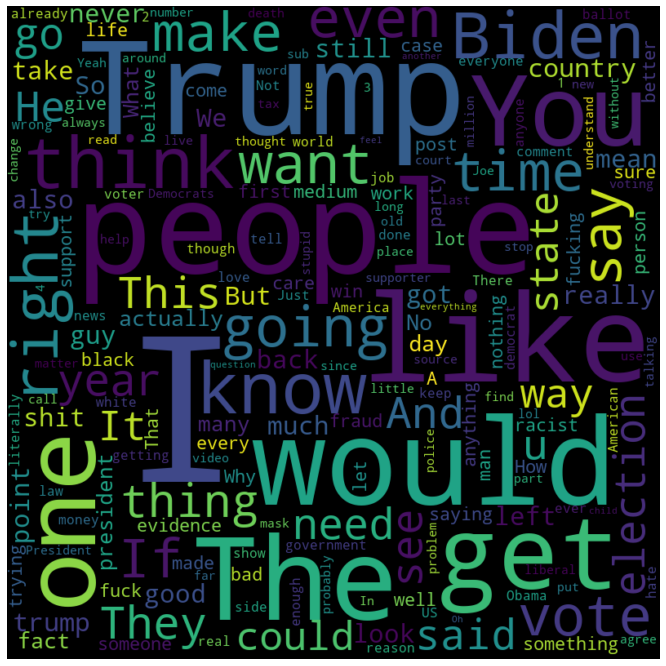

In [50]:
counter, word_freq = wordcloud(data)



Ни Берни, ни Клинтон, ни Обамы... Названий партий тоже нет. Байдена не очень упоминают. 

In [52]:
def wordcloud_by_date(dataset, year=None, month=None, day=None):
    dataset_cp = dataset.copy()
    
    if year:
        dataset_cp = dataset_cp[dataset_cp['year'] == year]
    if month:
        dataset_cp = dataset_cp[dataset_cp['month'] == month]
    if day:
        dataset_cp = dataset_cp[dataset_cp['day'] == day]
    
    return wordcloud(dataset_cp)

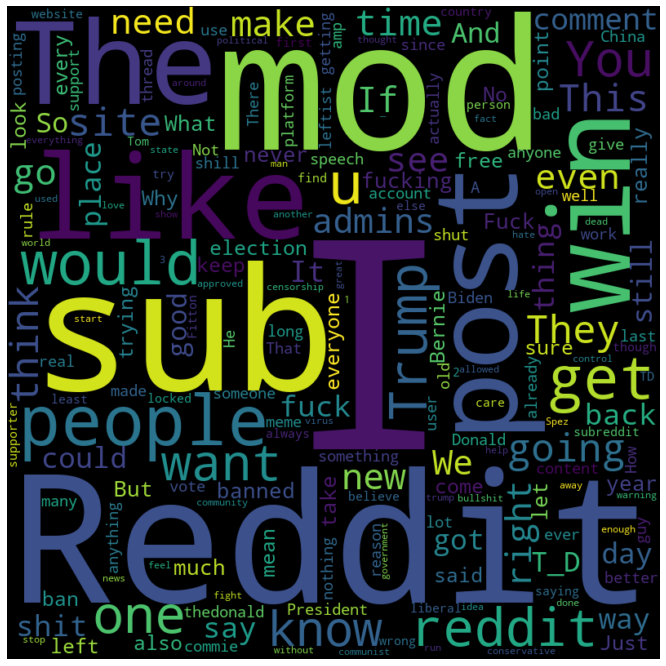

In [53]:
counter_march, word_freq_march = wordcloud_by_date(data, month=3)

Хохо! Тайна весеннего затишья начинает проясняться. Судя по всему в это время был разгул цензуры.

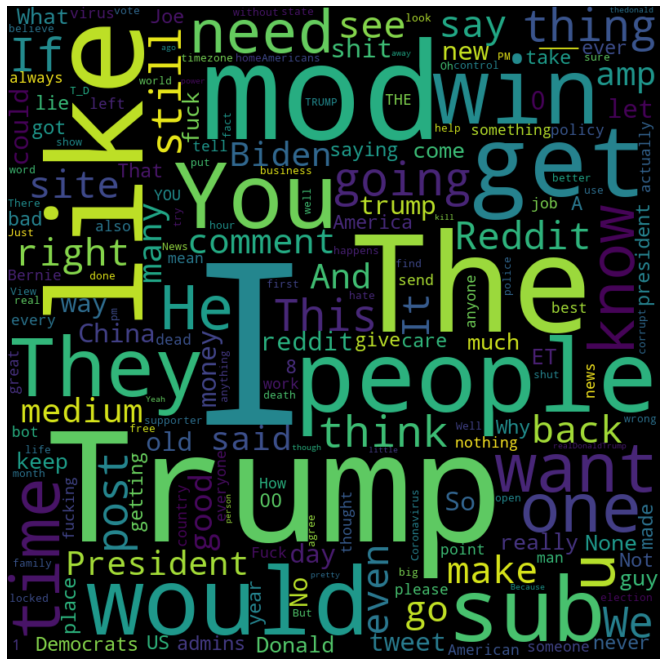

In [54]:
counter_april, word_freq_april = wordcloud_by_date(data, month=4)

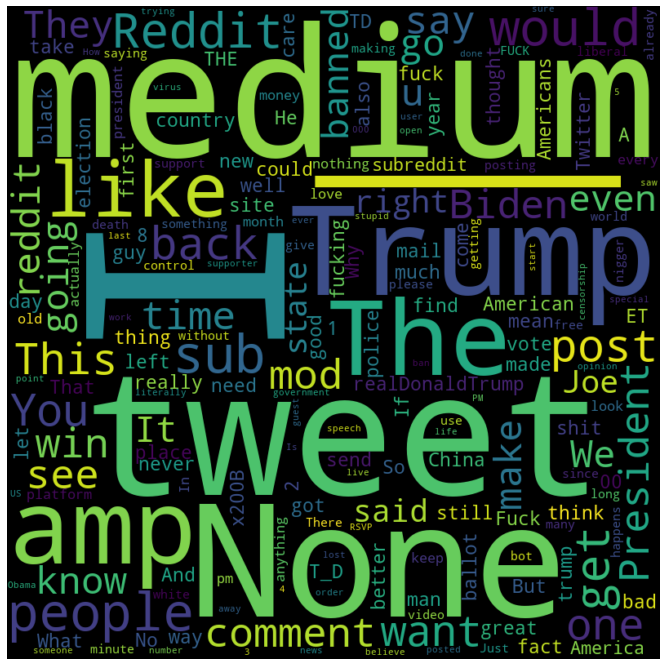

In [55]:
counter_may, word_freq_may = wordcloud_by_date(data, month=5)

Не очень понятно, почему всплывает medium. Это призыв к исходу туда? Надо гляуть нграммы.

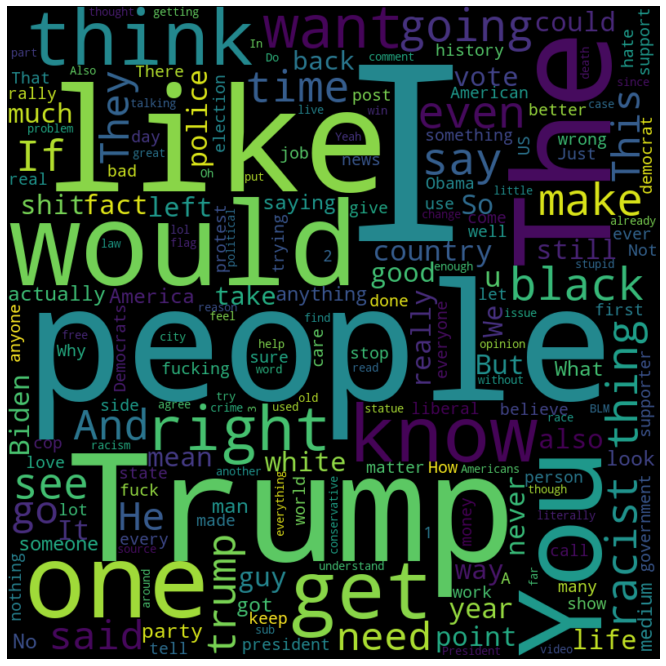

In [56]:
counter_june, word_freq_june = wordcloud_by_date(data, month=6)

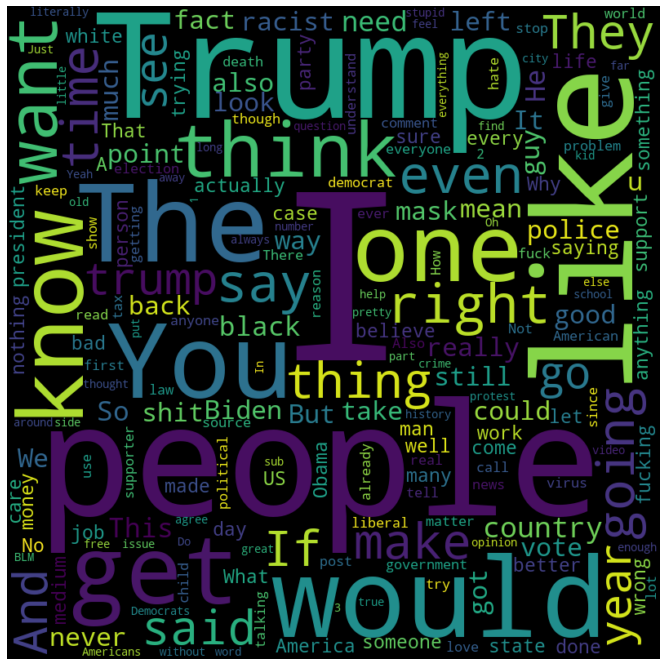

In [57]:
counter_november, word_freq_november = wordcloud_by_date(data, month=7)

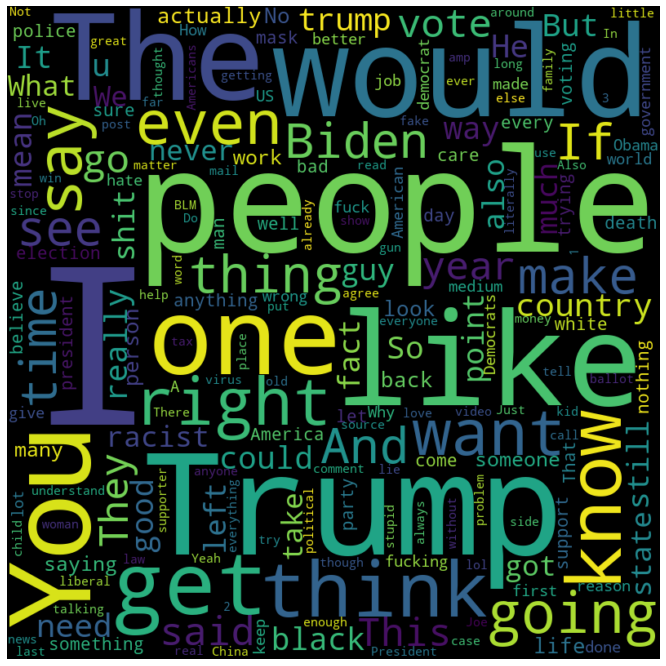

In [58]:
counter_december, word_freq_december = wordcloud_by_date(data, month=8)

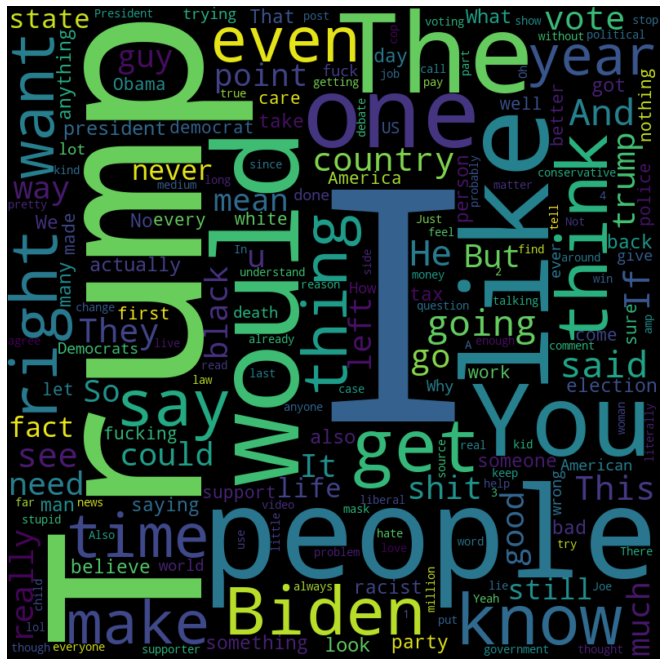

In [59]:
counter_july, word_freq_july = wordcloud_by_date(data, month=9)

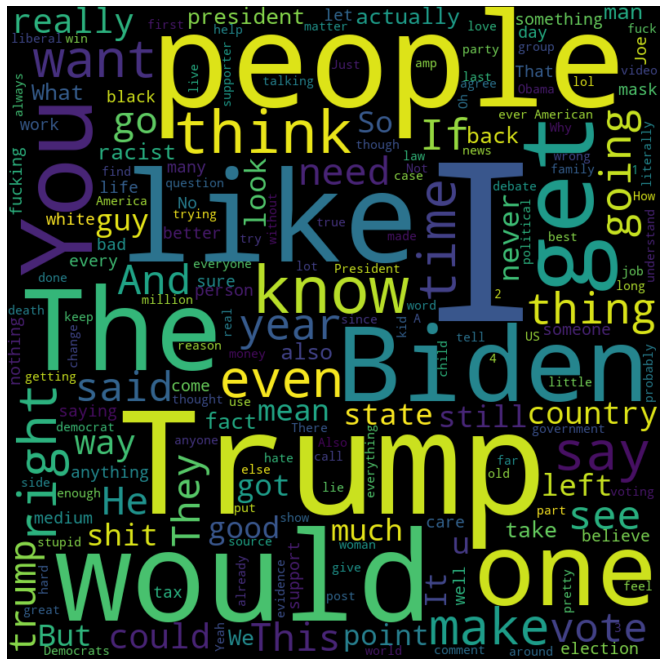

In [60]:
counter_august, word_freq_august = wordcloud_by_date(data, month=10)

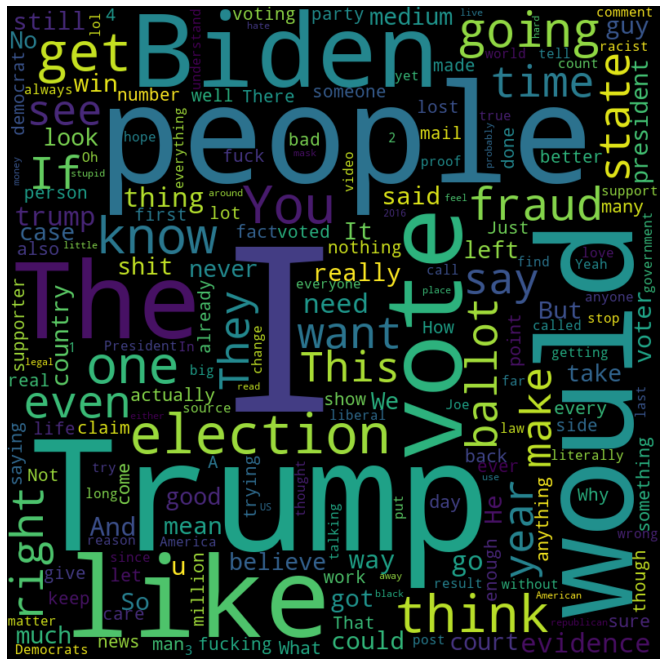

In [61]:
counter_september, word_freq_september = wordcloud_by_date(data, month=11)

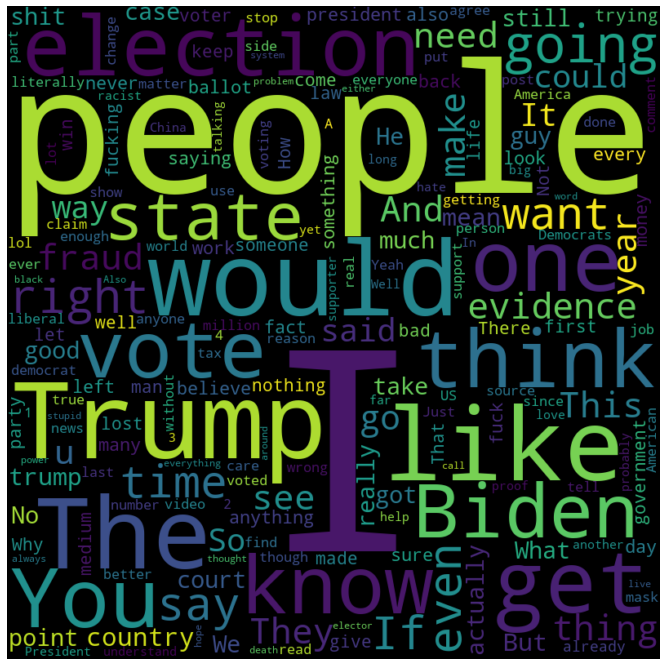

In [62]:
counter_october, word_freq_october = wordcloud_by_date(data, month=12)

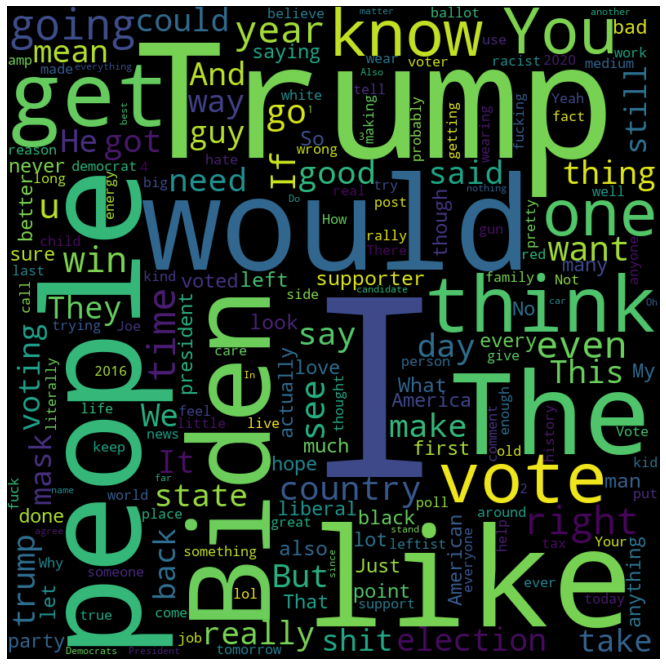

In [63]:
counter_preelection_day, word_freq_preelection_day = wordcloud_by_date(data, month=11, day = 3)

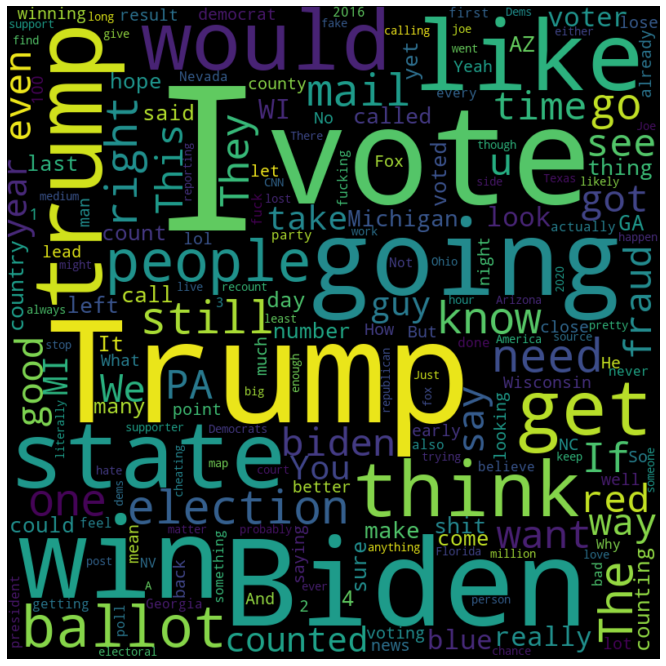

In [64]:
counter_election_day, word_freq_election_day = wordcloud_by_date(data, month=11, day = 4)

Видно что в отличие от предыдущего сабреддита здесь меньше обсуждают других кандидатов, даже Байдена, чье присутствие вырастает только к самим выборам. Споры явно эмоциональнее, много оскорблений, слово racist часто используется. 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


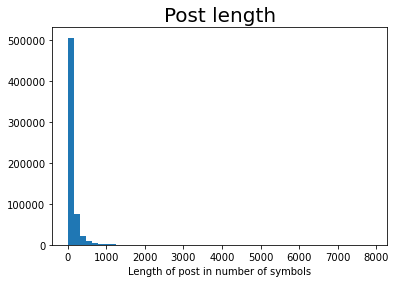

In [65]:
post_length = data['detokenized'].str.len()

plt.title('Post length', size = 20)
sns.distplot(post_length, kde = False,
             hist_kws = dict(alpha = 1))
plt.xlabel('Length of post in number of symbols')
plt.show()

Распределение длины постов в символах. Есть единичные просто огромные посты. 

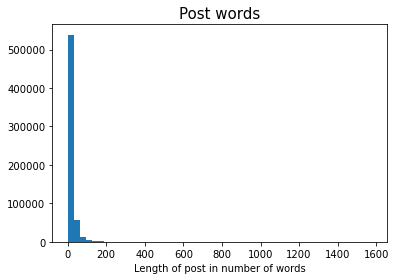

In [66]:
post_words = data['lemmatized'].map(lambda x: len(x))

plt.title('Post words', size = 15)
sns.distplot(post_words, kde = False,
             hist_kws = dict(alpha = 1))
plt.xlabel('Length of post in number of words')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


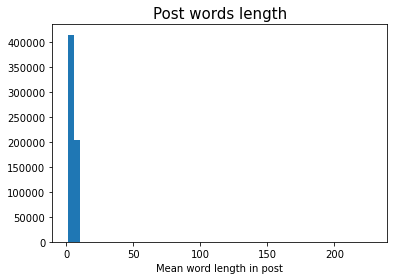

In [67]:
post_word_len = data['lemmatized'].apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))

plt.title('Post words length', size = 15, color = 'black')
sns.distplot(post_word_len, kde = False,  
             hist_kws = dict(alpha = 1))
plt.xlabel('Mean word length in post')
plt.show()

Вот это сейчас было очень внезапно. Если у Байдена распределение средней длины слов в посте походило на нормальное, то здесь творится что-то очень неестественное. Боты?...

In [68]:

def top_20_words(data):
        words = data['lemmatized'].values.tolist()
        post_corpus = [word for i in words for word in i]

        post_counter = Counter(post_corpus)
        post_most = post_counter.most_common()

        stop = set(stopwords.words('english'))

        post_top_words, post_top_words_count = [], []
        for word, count in post_most[:20]:
            if word not in stop:
                post_top_words.append(word)
                post_top_words_count.append(count)
        plt.title('TOP-20 words', color = 'black', size = 15)
        sns.barplot(y = post_top_words[:20], x = post_top_words_count[:20], 
                    edgecolor = 'black', color = 'blue')
        plt.show()

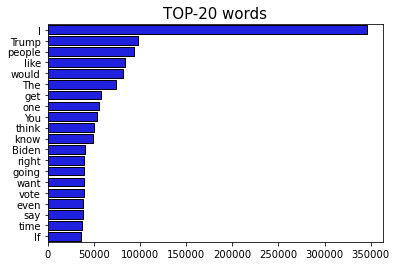

In [69]:
top_20_words(data)

In [70]:
def top20_words_by_date(dataset, year=None, month=None, day=None):
    dataset_cp = dataset.copy()
    
    if year:
        dataset_cp = dataset_cp[dataset_cp['year'] == year]
    if month:
        dataset_cp = dataset_cp[dataset_cp['month'] == month]
    if day:
        dataset_cp = dataset_cp[dataset_cp['day'] == day]
    
    return top_20_words(dataset_cp)

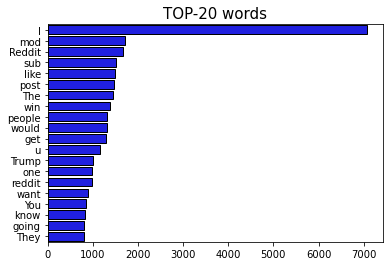

In [71]:
top20_words_by_date(data, month = 3)

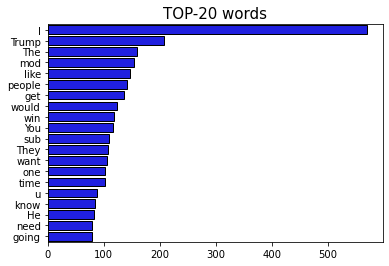

In [72]:
top20_words_by_date(data, month = 4)

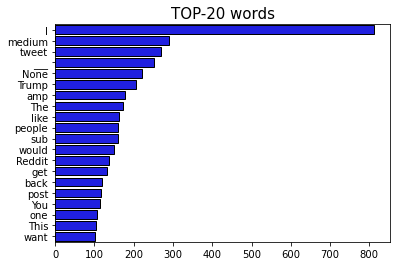

In [73]:
top20_words_by_date(data, month = 5)

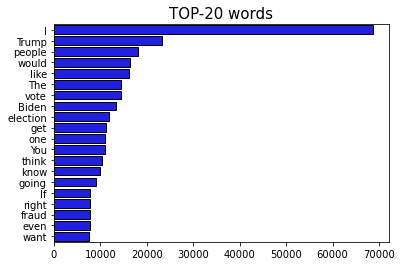

In [74]:
top20_words_by_date(data, month = 11)

Слово fraud закономерно вылезает в ноябре.

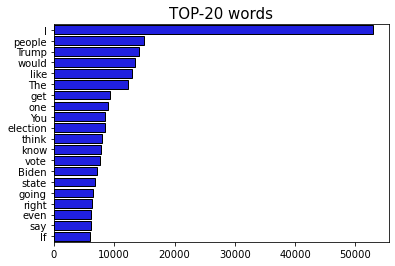

In [75]:
top20_words_by_date(data, month = 12)

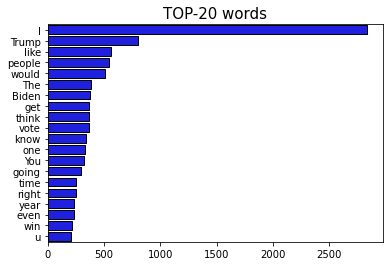

In [76]:
top20_words_by_date(data, month = 11, day = 3)

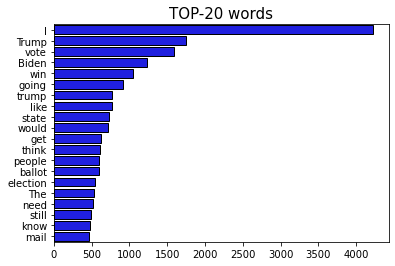

In [77]:
top20_words_by_date(data, month = 11, day = 4)

Снова нужны нграммы, по словам ничего прям интересного не понять. 

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n = 2):
    vec = CountVectorizer(stop_words = stop, ngram_range = (n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq

In [79]:
top_bigrams = get_top_ngram(data['detokenized'], 2)[:10]
title_x, title_y = map(list, zip(*top_bigrams))


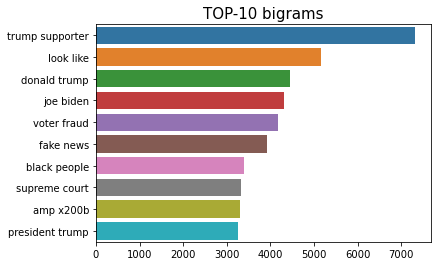

In [78]:
plt.title('TOP-10 bigrams', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

amp x200b судя по всему куски HTML , вылезавшие из-за багов реддита, по крайней мере посты на самом реддите об этом есть. Fake News не очень неожиданно, вот black people довольно интересно. 

In [80]:
top_trigrams = get_top_ngram(data['detokenized'], 3)[:10]
title_x, title_y = map(list, zip(*top_trigrams))

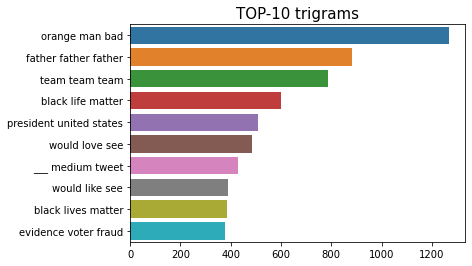

In [81]:
plt.title('TOP-10 trigrams', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

Ага, обсуждения Black lives matter (удивительно, но у Байдена его судя по всему обсуждали значительно меньше), мемы. Team team team и father father father может быть мемами, но я их не нашел. 

In [95]:
data_november = data[data['month'] == 11]
data_march = data[data['month'] == 3]
data_december = data[data['month'] == 12]
data_june = data[data['month'] == 6]
data_april = data[data['month'] == 4]
data_may = data[data['month'] == 5]
data_october = data[data['month'] == 10]
data_july = data[data['month'] == 7]
data_august = data[data['month'] == 8]

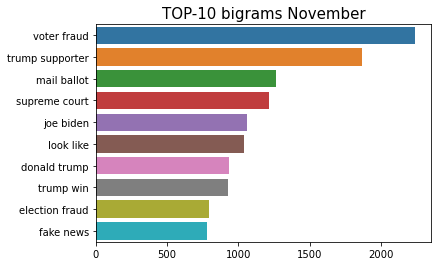

In [83]:
top_bigrams = get_top_ngram(data_november['detokenized'], 2)[:10]
title_x, title_y = map(list, zip(*top_bigrams))
plt.title('TOP-10 bigrams November', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

Голосование по почте и обсуждения результатов выборов. Voter Fraud ожидаемо в топе. 

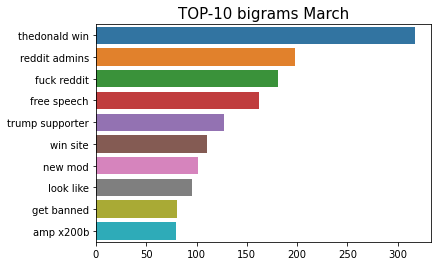

In [84]:
top_bigrams = get_top_ngram(data_march['detokenized'], 2)[:10]
title_x, title_y = map(list, zip(*top_bigrams))
plt.title('TOP-10 bigrams March', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

Волна банов в Марте....

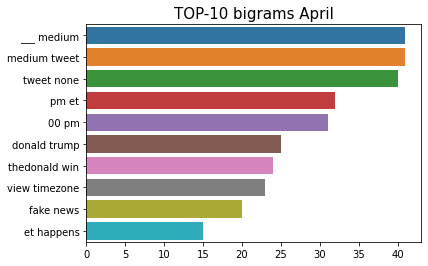

In [85]:
top_bigrams = get_top_ngram(data_april['detokenized'], 2)[:10]
title_x, title_y = map(list, zip(*top_bigrams))
plt.title('TOP-10 bigrams April', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

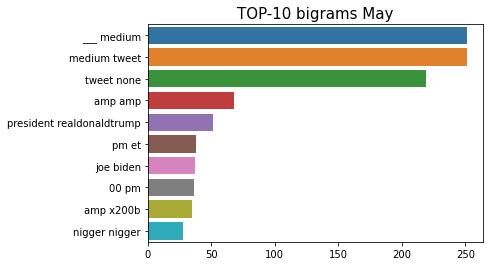

In [86]:
top_bigrams = get_top_ngram(data_may['detokenized'], 2)[:10]
title_x, title_y = map(list, zip(*top_bigrams))
plt.title('TOP-10 bigrams May', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

Опять баги и загадочное medium tweet. Nigger nigger выглядит как попытки вандализма в ответ на баны 

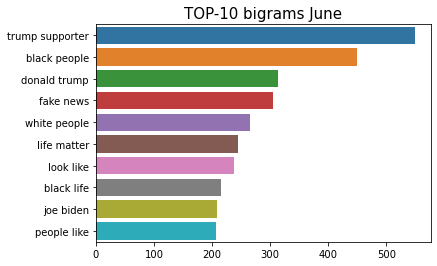

In [87]:
top_bigrams = get_top_ngram(data_june['detokenized'], 2)[:10]
title_x, title_y = map(list, zip(*top_bigrams))
plt.title('TOP-10 bigrams June', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

Активное обсуждение БЛМ в июне. 

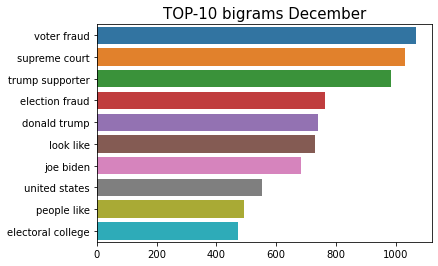

In [88]:
top_bigrams = get_top_ngram(data_december['detokenized'], 2)[:10]
title_x, title_y = map(list, zip(*top_bigrams))
plt.title('TOP-10 bigrams December', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

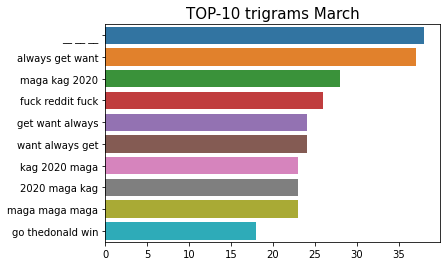

In [89]:
top_trigrams = get_top_ngram(data_march['detokenized'], 3)[:10]
title_x, title_y = map(list, zip(*top_trigrams))
plt.title('TOP-10 trigrams March', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

Спам лозунгами в ответ на баны?

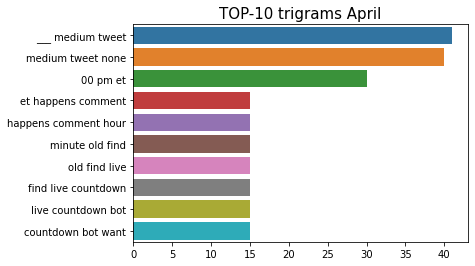

In [90]:
top_trigrams = get_top_ngram(data_april['detokenized'], 3)[:10]
title_x, title_y = map(list, zip(*top_trigrams))
plt.title('TOP-10 trigrams April', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

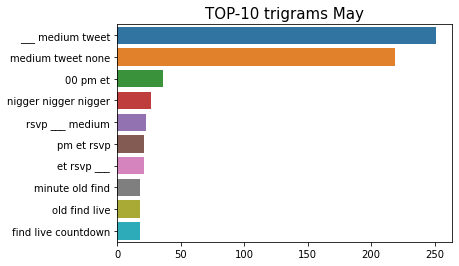

In [91]:
top_trigrams = get_top_ngram(data_may['detokenized'], 3)[:10]
title_x, title_y = map(list, zip(*top_trigrams))
plt.title('TOP-10 trigrams May', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

Да, явно похоже на вандализм в отместку за баны с использованием ботов. 

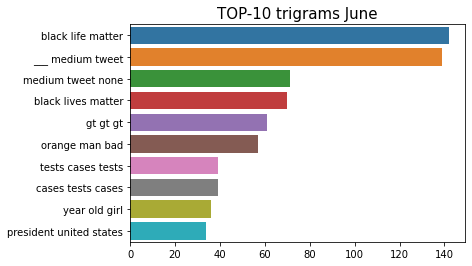

In [92]:
top_trigrams = get_top_ngram(data_june['detokenized'], 3)[:10]
title_x, title_y = map(list, zip(*top_trigrams))
plt.title('TOP-10 trigrams June', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

Мемы про коронавирус летом. 

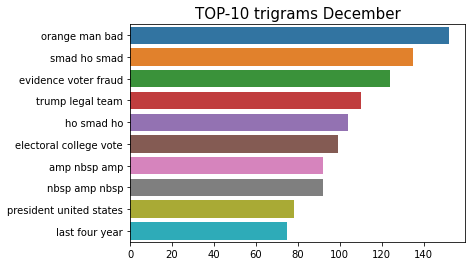

In [93]:
top_trigrams = get_top_ngram(data_december['detokenized'], 3)[:10]
title_x, title_y = map(list, zip(*top_trigrams))
plt.title('TOP-10 trigrams December', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

Утрирование позиции оппонента мемами про orange man bad явно популярно. 

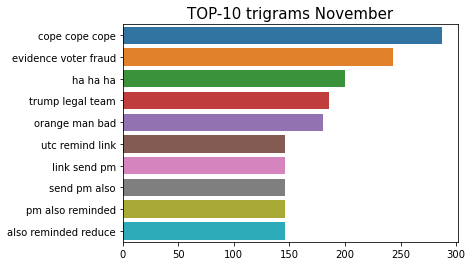

In [94]:
top_trigrams = get_top_ngram(data_november['detokenized'], 3)[:10]
title_x, title_y = map(list, zip(*top_trigrams))
plt.title('TOP-10 trigrams November', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

О, интересно. Судя по всему в Ноябре реддит автоматически удалял много постов! Глянем еще что было за месяц до выборов и летом. 

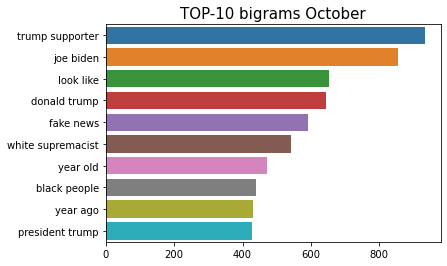

In [96]:
top_bigrams = get_top_ngram(data_october['detokenized'], 2)[:10]
title_x, title_y = map(list, zip(*top_bigrams))
plt.title('TOP-10 bigrams October', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

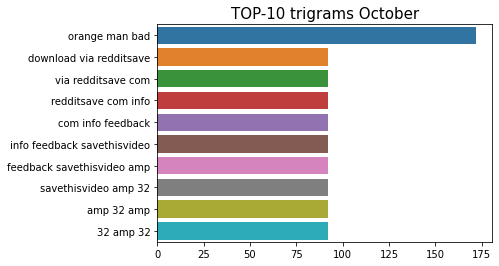

In [97]:
top_trigrams = get_top_ngram(data_october['detokenized'], 3)[:10]
title_x, title_y = map(list, zip(*top_trigrams))
plt.title('TOP-10 trigrams October', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

Видео, которое нужно сохранить, это скорее всего компромат на Хантера Байдена. По крайней мере по датам совпадает.

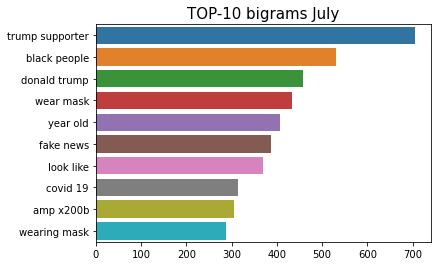

In [98]:
top_bigrams = get_top_ngram(data_july['detokenized'], 2)[:10]
title_x, title_y = map(list, zip(*top_bigrams))
plt.title('TOP-10 bigrams July', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

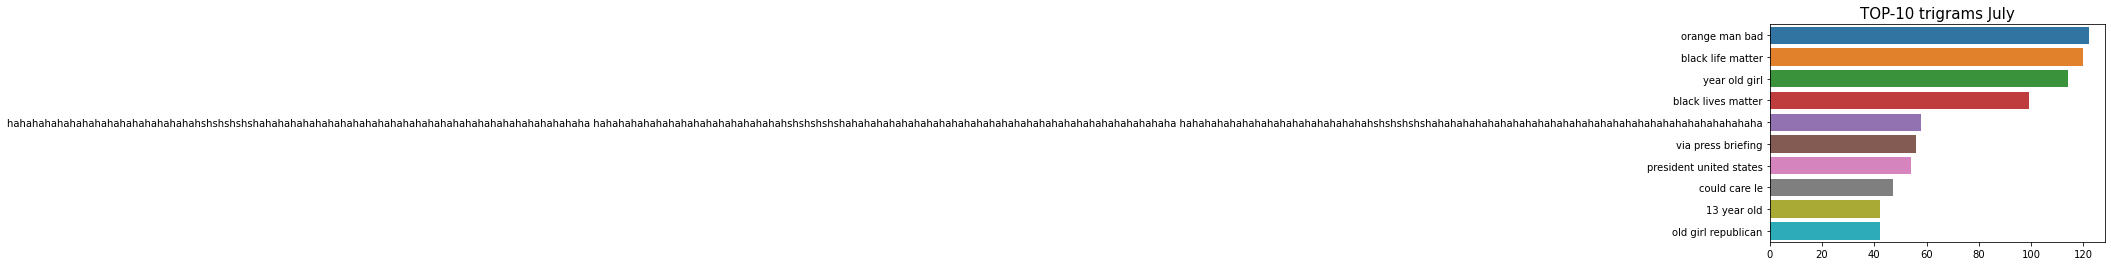

In [99]:
top_trigrams = get_top_ngram(data_july['detokenized'], 3)[:10]
title_x, title_y = map(list, zip(*top_trigrams))
plt.title('TOP-10 trigrams July', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

Либо мем, либо ,быть может, что-то связанное с тем что Трампа вроде обвиняли в педофилии в какой-то момент. 

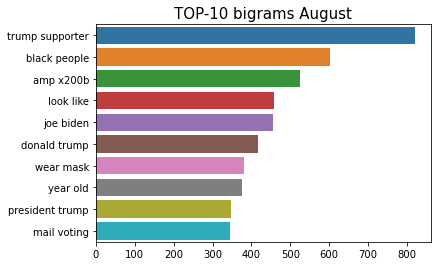

In [100]:
top_bigrams = get_top_ngram(data_august['detokenized'], 2)[:10]
title_x, title_y = map(list, zip(*top_bigrams))
plt.title('TOP-10 bigrams August', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

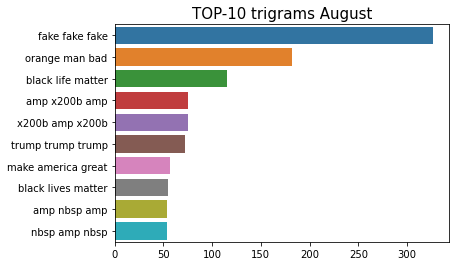

In [101]:
top_trigrams = get_top_ngram(data_august['detokenized'], 3)[:10]
title_x, title_y = map(list, zip(*top_trigrams))
plt.title('TOP-10 trigrams August', color = 'black', size = 15)
sns.barplot(x = title_y, y = title_x)
plt.show()

Вообще любопытно , что среди сторонников Трампа куда больше обсуждали новостную повестку (ковид и БЛМ), чем среди сторонников Байдена. 